**Data Visualization interattiva con plotly**
> Antonio Piemontese 2025

Un'attività spesso sottovalutata dalle aziende, che passano subito a "cose più interessanti": i modelli predittivi.<br>
EDA è indispensabile e richiede conosccenze di business, oltre che tecniche.

![EDA](EDA.png)

Useremo il famoso dataset [**German Credit Data**](https://www.kaggle.com/code/kabure/predicting-credit-risk-model-pipeline), un dataset preparato negli anni '90 da un professore universitario tedesco, contenente 1000 richieste di prestito bancario (*loan applications*) descritte ognuna da <u>20 variabili</u>. In una versione semplificata. 

La descrizione del dataset:

![](german_credit_description.png)

![](credit_score.png)

# Caricamenti

Useremo il package di plot [plotly](https://plotly.com/python/getting-started/), che è una implementazione python del prodotto [plotly](https://plotly.com/) di grafica.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

from dmba import classificationSummary  # carica in memoria SOLO la funzione classificationSummary (alternativa: import dmba - carica in memoria
                                        # tutto il package

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

In [3]:
df_credit.shape

(1000, 10)

# Data Visualization

## Esame generale dei dati

In [4]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
# ricerca di missing value
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [6]:
df_credit.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
# ricerca di valori unici 
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [8]:
# valori duplicati?
df_credit.duplicated().sum()

np.int64(0)

In [9]:
df_credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [10]:
df_credit.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

## Analisi Dati Esplorativa (EDA)
Esempi di analisi:
* la distribuzione della colonna *Age*
* qualche grafico *seaborn*
* incrocio colonne (*columns crossing*)

In [11]:
df_credit["Sex"].value_counts(normalize=True)

Sex
male      0.69
female    0.31
Name: proportion, dtype: float64

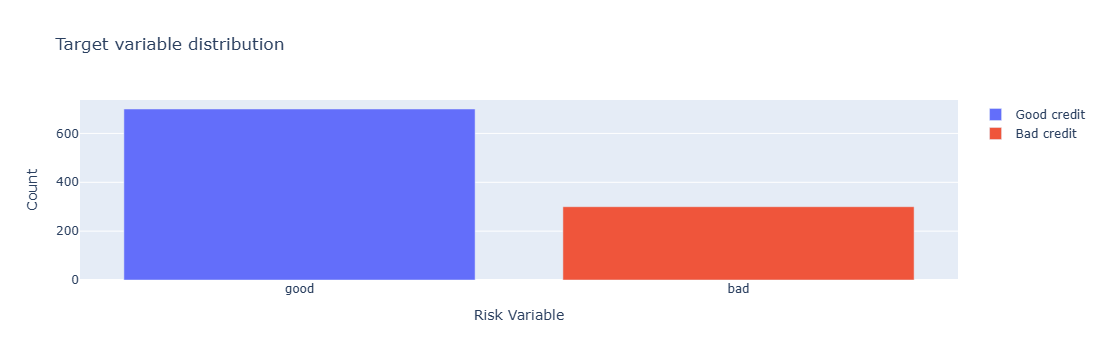

In [12]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

I will try implement some interactive visuals in my Kernels, this will be the first, inspired in Alexader's Kernel and I will also continue implementing plotly and bokeh in my Kernel.

C:\Users\Utente\anaconda3\envs\myenv\Lib\site-packages\plotly\tools.py:453: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



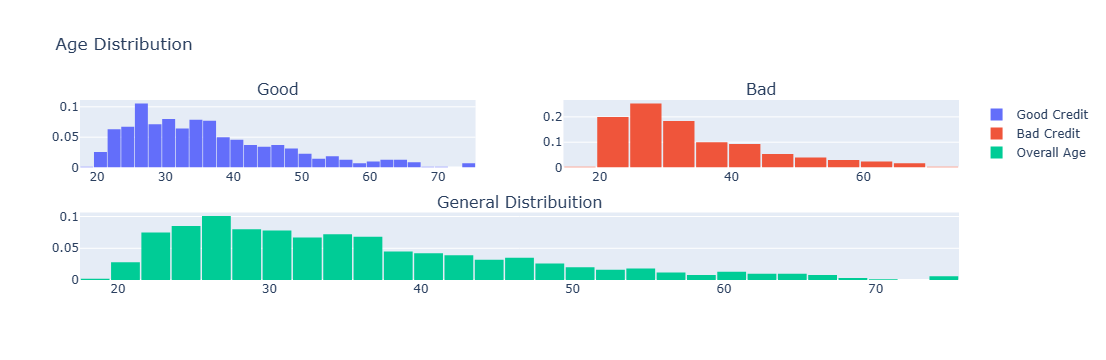

In [13]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribution', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

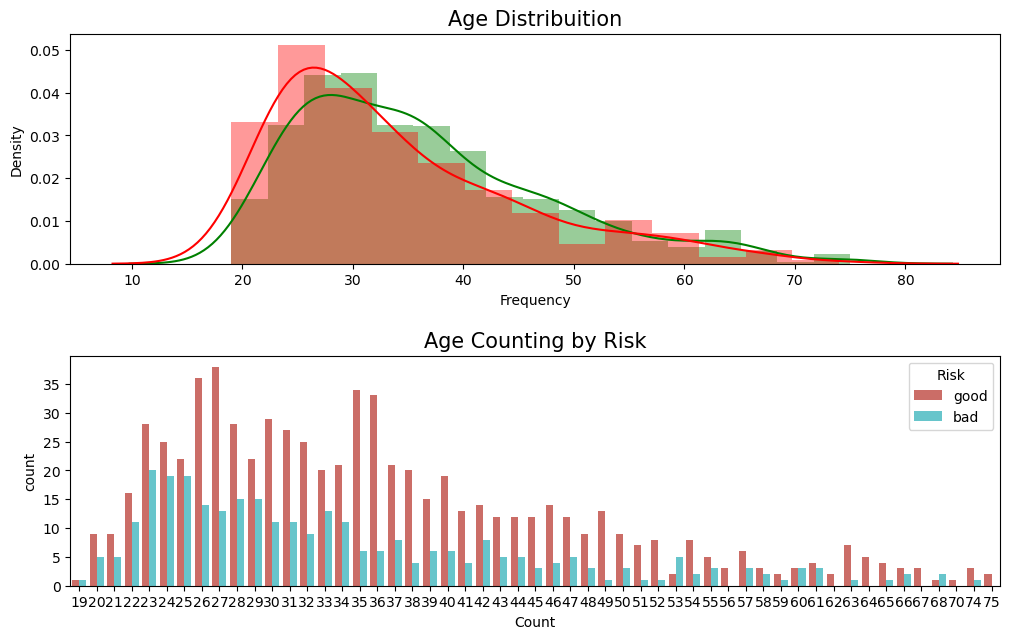

In [14]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()


Creating an categorical variable to handle with the Age variable

In [15]:
#Let's look the Credit Amount column

# discretizzazione della colonna Age (per poterla mostrare in boxplot separati)
interval = (18, 25, 35, 60, 120)
cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)

df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

In [16]:
df_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student
2,49,male,1,own,little,NaN,2096,12,education,good,Adult
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult
4,53,male,2,free,little,little,4870,24,car,bad,Adult
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,Young
996,40,male,3,own,little,little,3857,30,car,good,Adult
997,38,male,2,own,little,NaN,804,12,radio/TV,good,Adult
998,23,male,2,free,little,little,1845,45,radio/TV,bad,Student


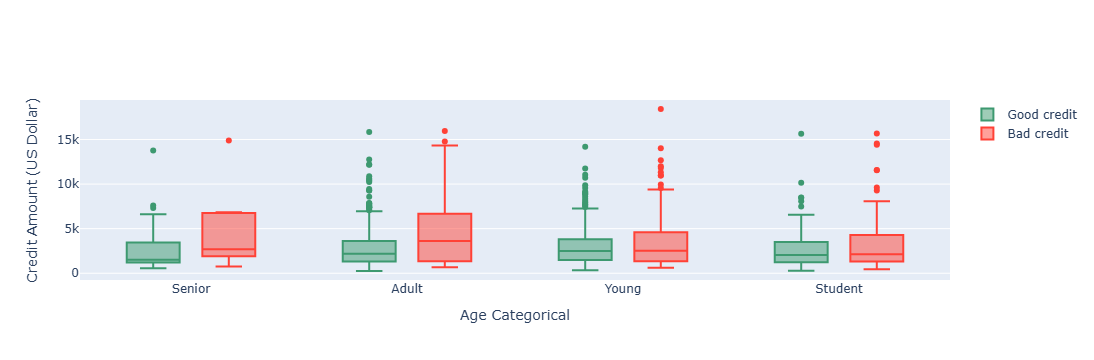

In [17]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

Interesting distribution.

I will now Look the distribution of Housing own and rent by Risk

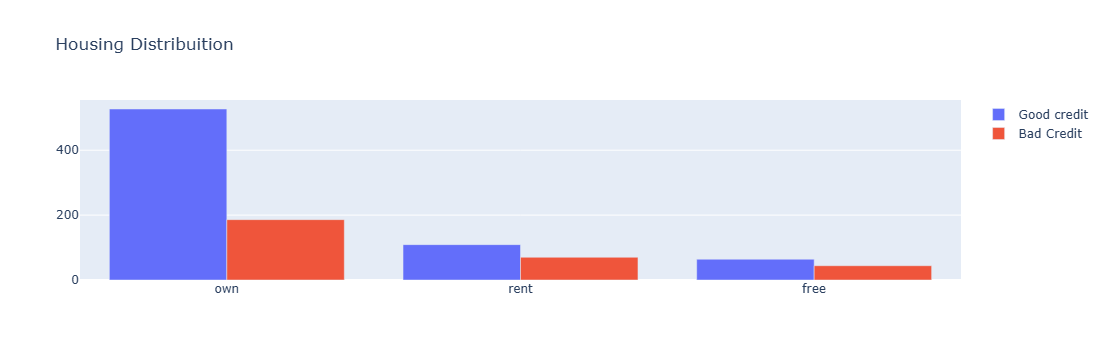

In [18]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

we can see that the own and good risk have a high correlation

Distribution of Credit Amonut by Housing

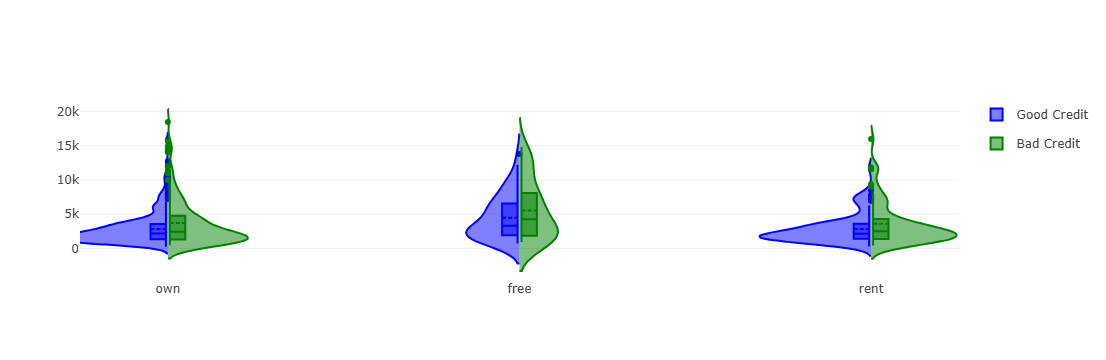

In [19]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

Interesting movements! Highest values come from category "free" and we have a different distribuition by Risk

Looking at the diference by Sex

C:\Users\Utente\anaconda3\envs\myenv\Lib\site-packages\plotly\tools.py:453: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



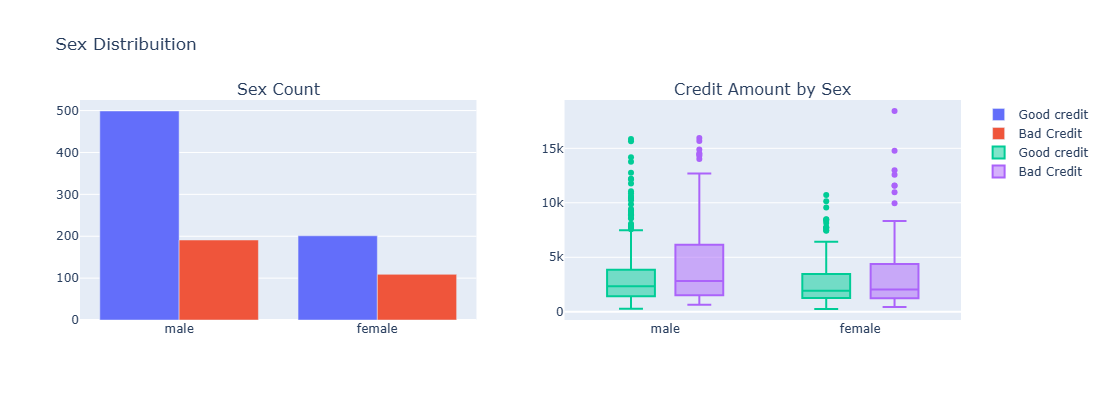

In [20]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"],
    y = df_credit[df_credit["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"],
    y = df_credit[df_credit["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

How can I set the boxplots in different places? how can I use the same legend to both graphs?<br>

I will create categories of Age and look the distribuition of Credit Amount by Risk...<br>

I will do some explorations through the Job:
* Distribution
* Crossed by Credit amount
* Crossed by Age

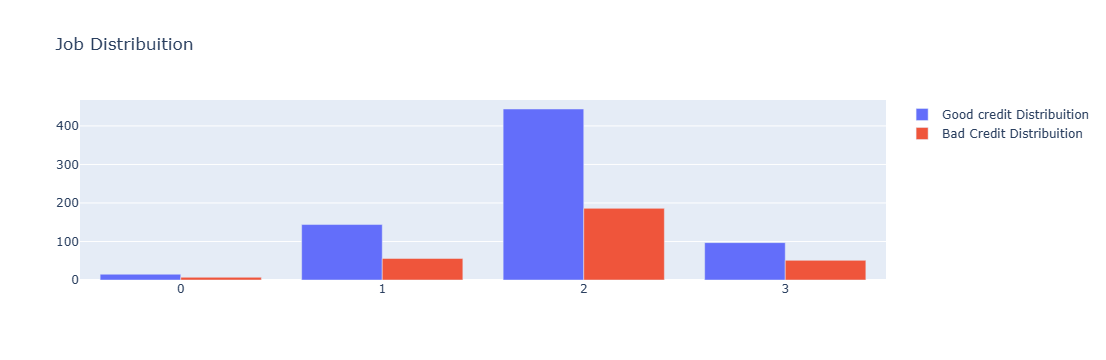

In [21]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

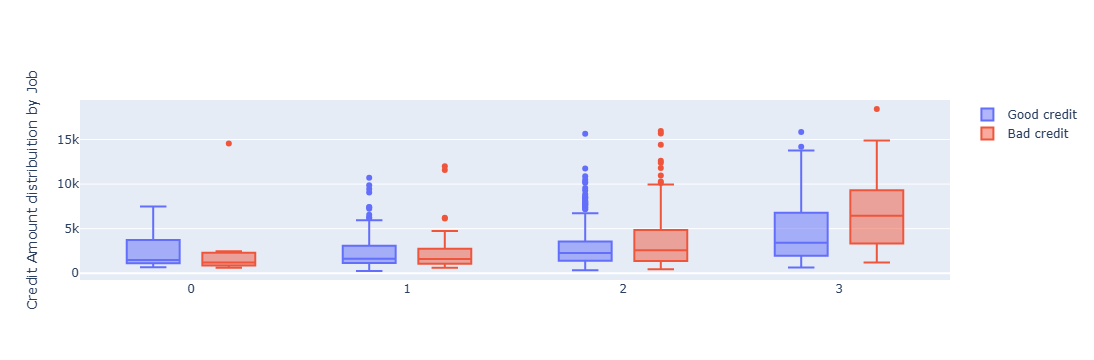

In [22]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

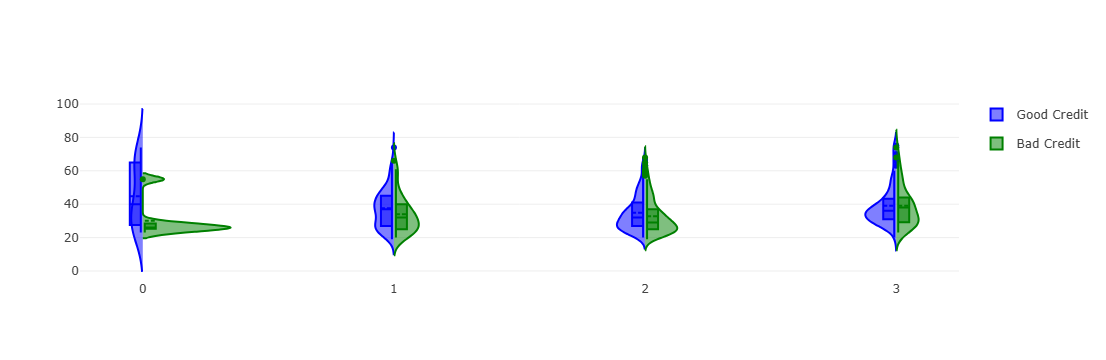

In [23]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'Age-Housing', validate = False)

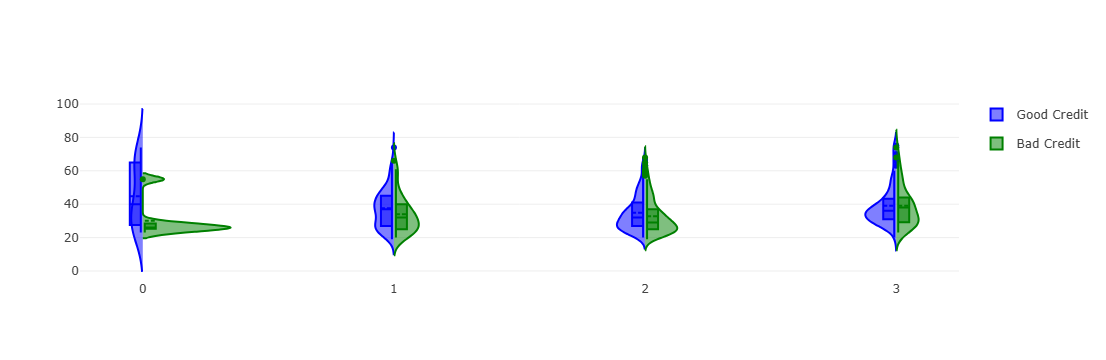

In [24]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'Age-Housing', validate = False)

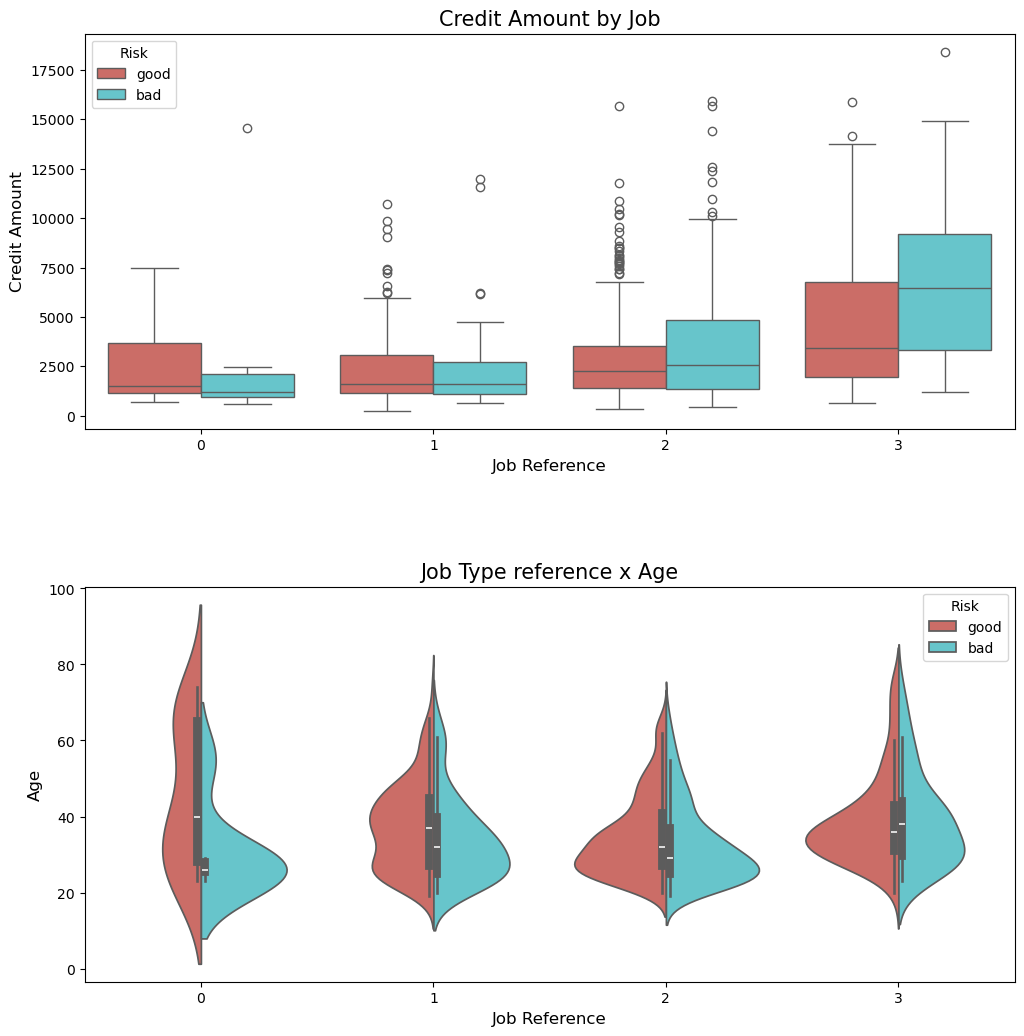

In [25]:
# plot statici fatti con seaborn
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit amount", data=df_credit, 
            palette="hls", ax=ax[0], hue="Risk")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df_credit, ax=ax[1],  
               hue="Risk", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

Looking the distribution of Credit Amount:

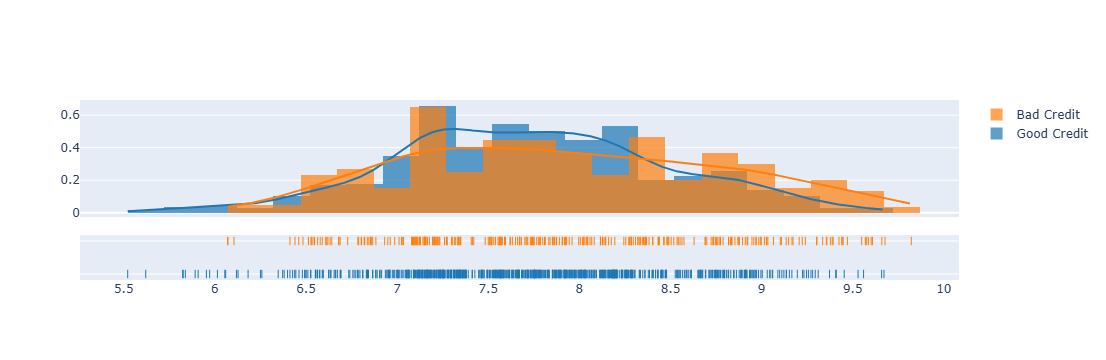

In [26]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')


Il plot precedente mostra gli istogrammi della colonna `Credit amount` **logaritmica**, suddivisi per sotto-popolazione *good* e *bad*, con la rispettiva stima kernel sovrapposta.<br>
La funzione `np.exp` è l'inversa del logaritmo in base naturale.

In [27]:
import numpy as np
print(np.exp(5.521461))
np.exp(9.82141)

250.00002053443933


np.float64(18424.010289797276)

In [28]:
df_credit['Credit amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64

I due logaritmi corrispondono effettivamente al min e max originale

Facciamo, per imparare, una verifica alternativa. Cioè, modifichiamo i dati con `numpy.log` e poi facciamo un istogramma pandas:

In [29]:
df_credit['Credit amount log'] = np.log(df_credit['Credit amount'])

<Axes: >

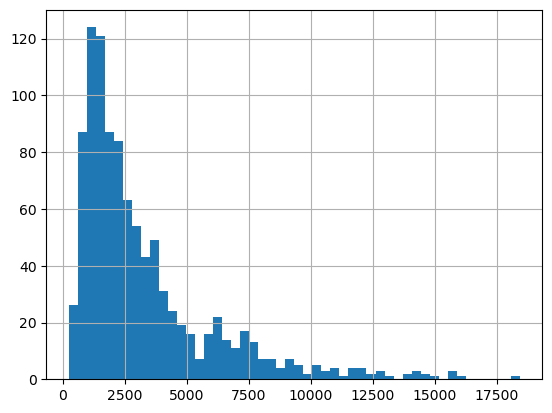

In [30]:
import numpy as np
np.log
df_credit['Credit amount'].hist(bins=50)

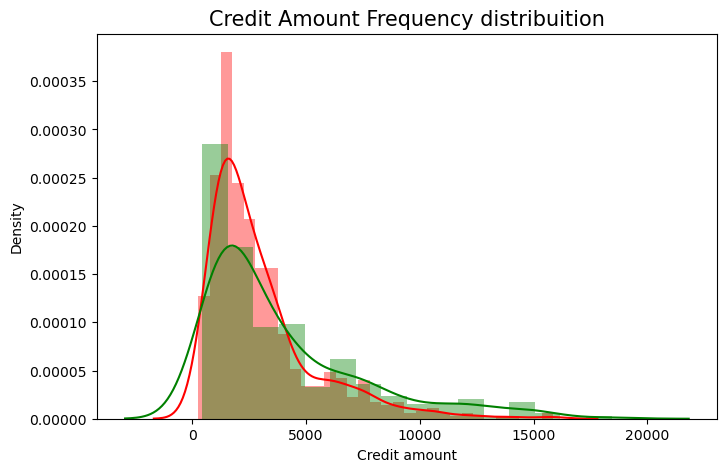

In [31]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['Credit amount'], color='r')
g = sns.distplot(df_bad["Credit amount"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

Distribution of Saving Accounts by Risk:

C:\Users\Utente\anaconda3\envs\myenv\Lib\site-packages\plotly\tools.py:453: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



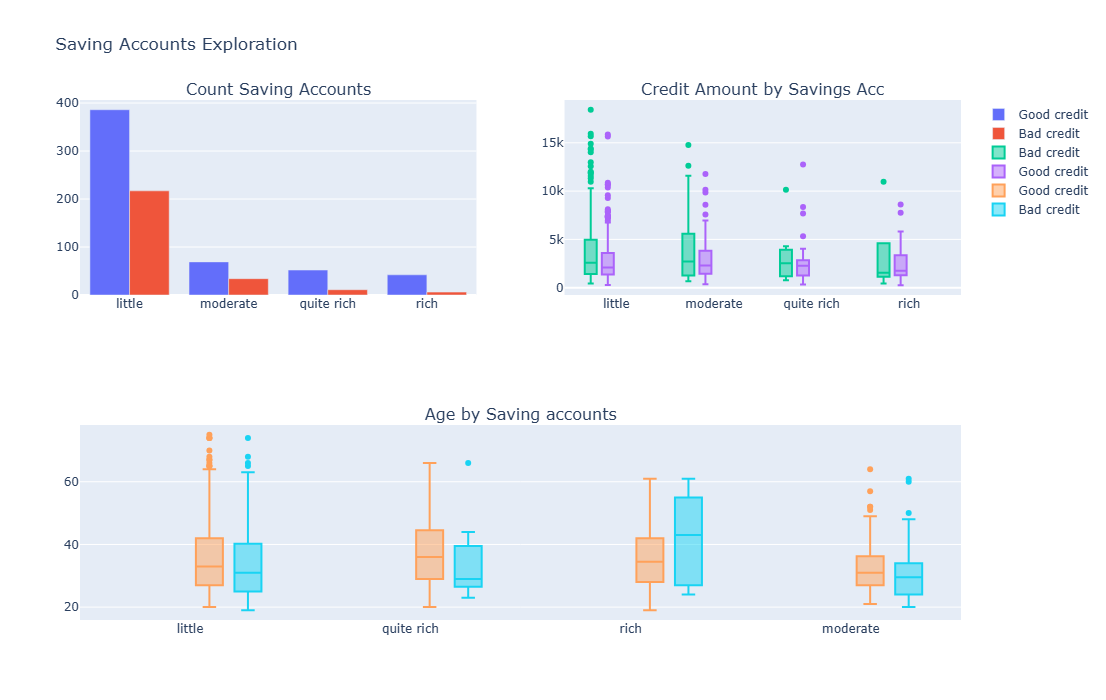

In [32]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')

This is the format of your plot grid:<br>
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]<br>
[ (2,1) x3,y3           -      ]

How can I better configure the legends? I am trying to substitute the graph below, so how can I use the violinplot on subplots of plotly?

Description of Distribuition Saving accounts by Risk:  
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


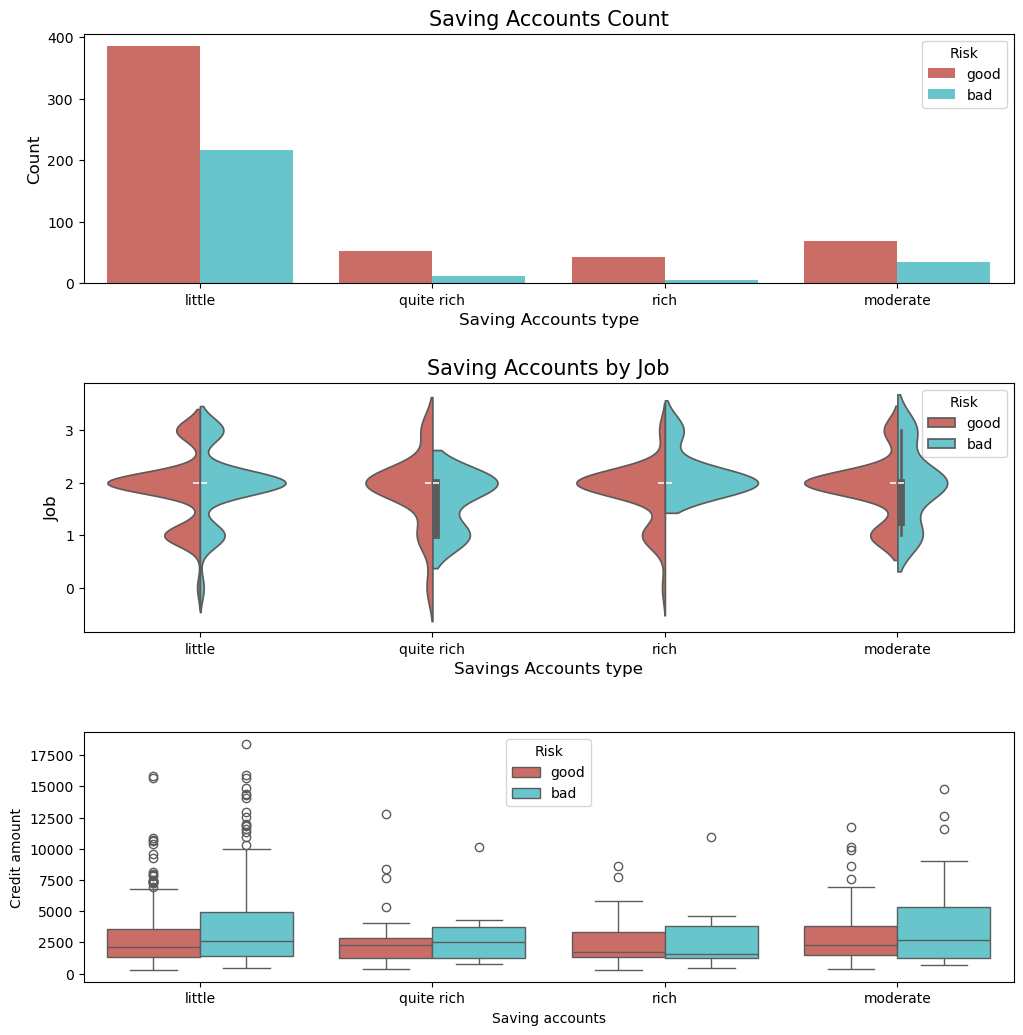

In [33]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df_credit["Saving accounts"],df_credit.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df_credit, palette="hls", 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df_credit, palette="hls", 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2],
            hue = "Risk",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

Pretty and interesting distribution...

Values describe: 
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


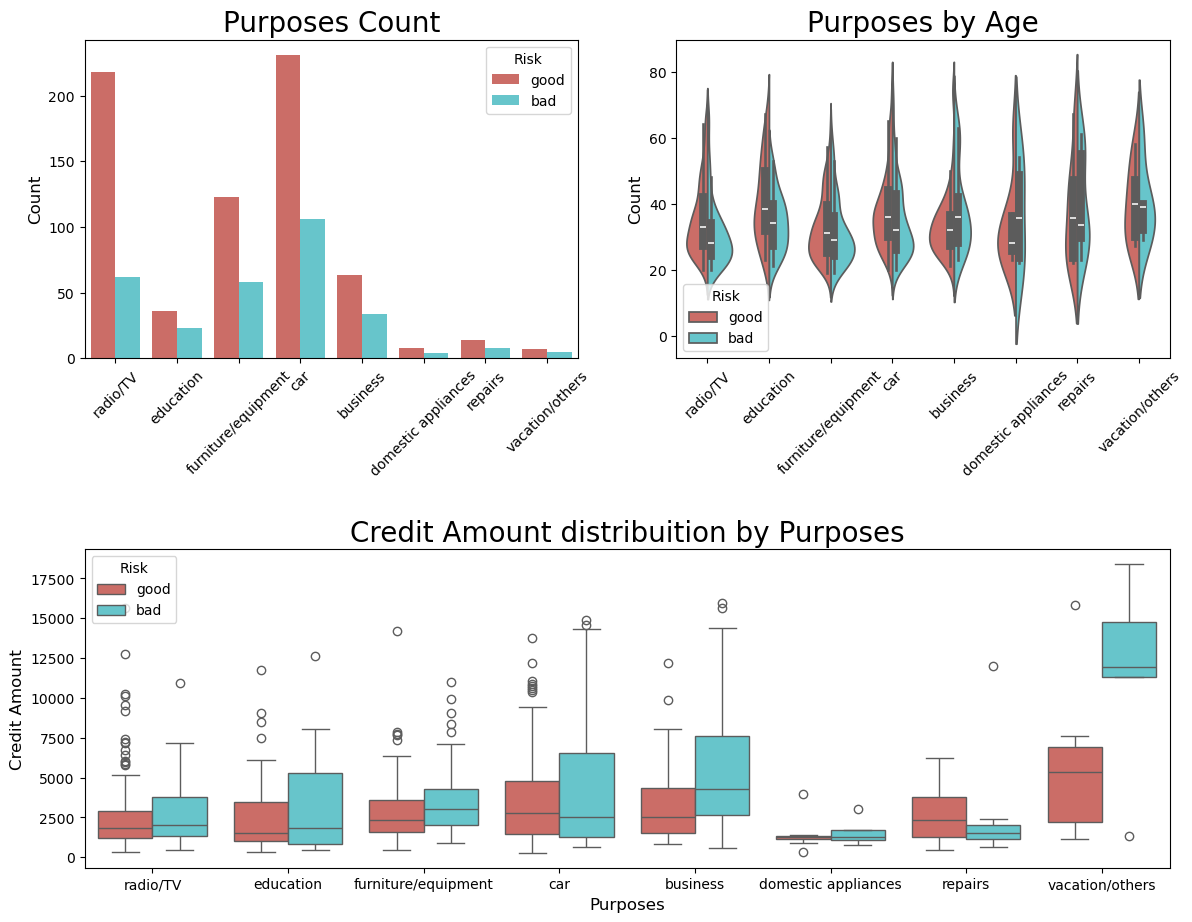

In [34]:
print("Values describe: ")
print(pd.crosstab(df_credit.Purpose, df_credit.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df_credit, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=df_credit, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()


Duration of the loans distribuition and density

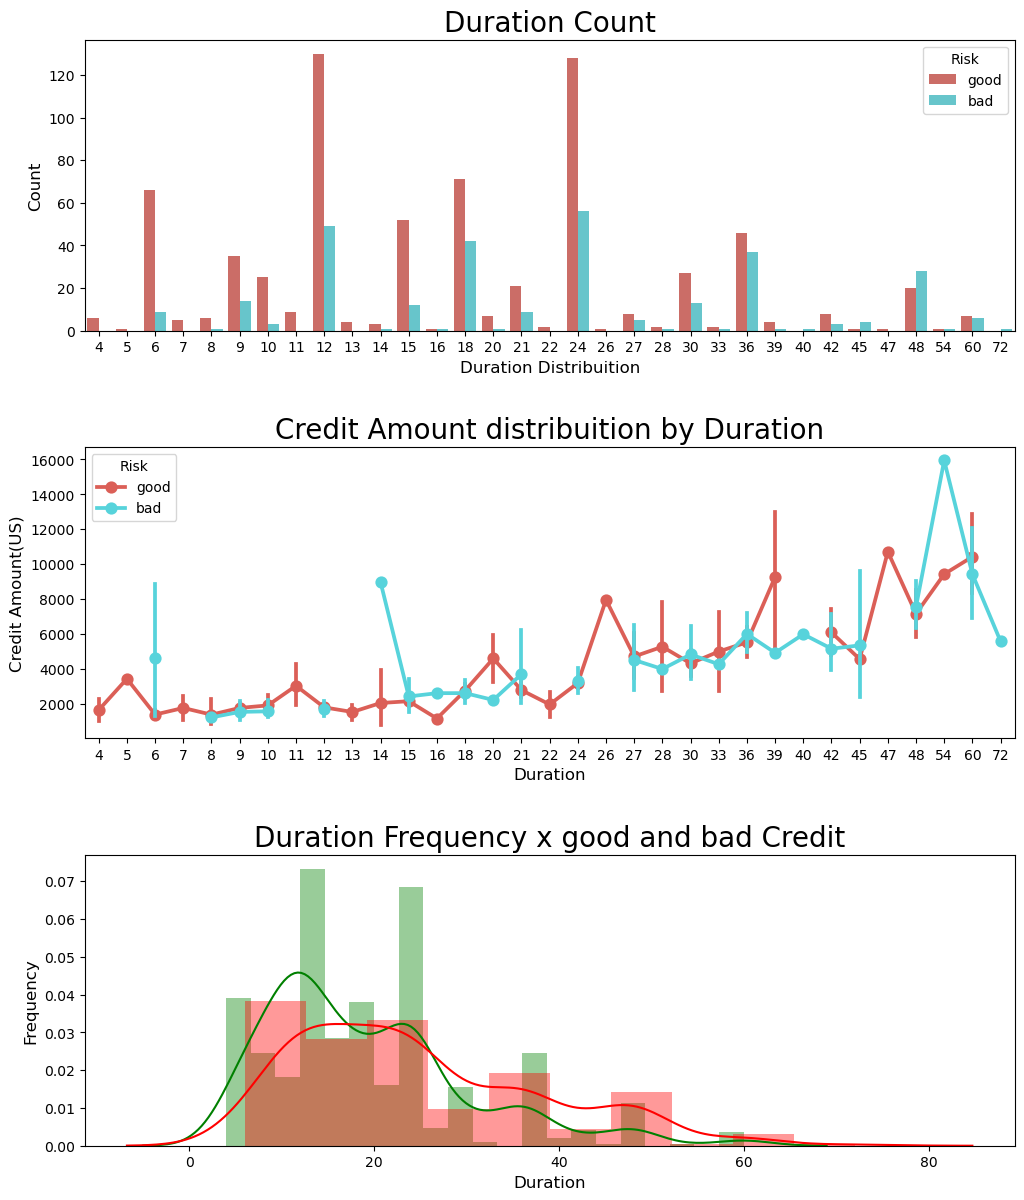

In [35]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df_credit, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df_credit,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

Interesting, we can see that the highest duration have the high amounts.<br>
The highest density is between [12 ~ 18 ~ 24] months.<br>
It all make sense.

Checking Account variable.<br>
First, let's look at the distribution:

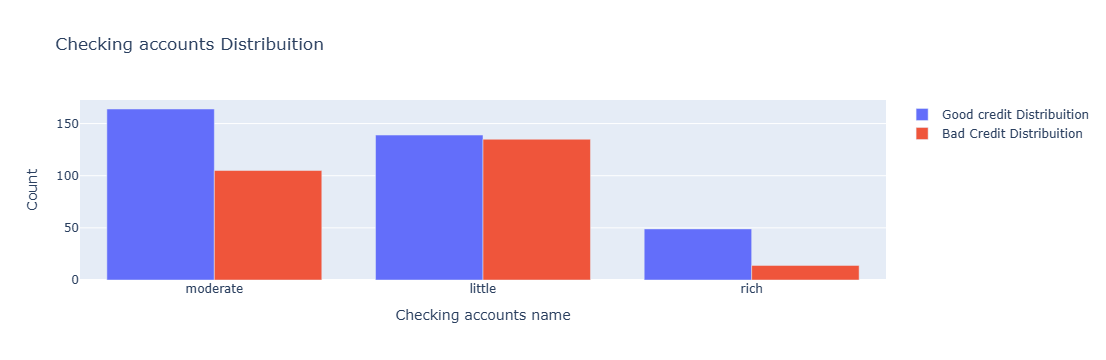

In [36]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Age-ba', validate = False)

Now, we will verify the values through Checking Accounts

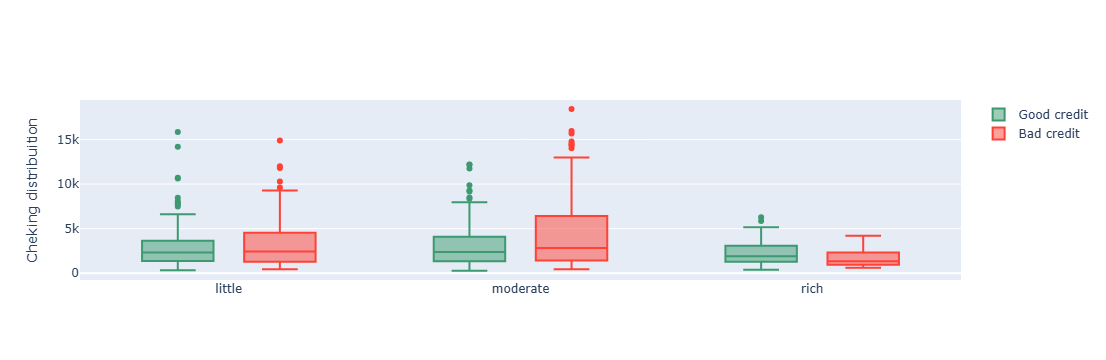

In [37]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Checking account"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Checking account'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

The old plot that I am trying to substitute with interactive plots:

Total values of the most missing variable: 
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


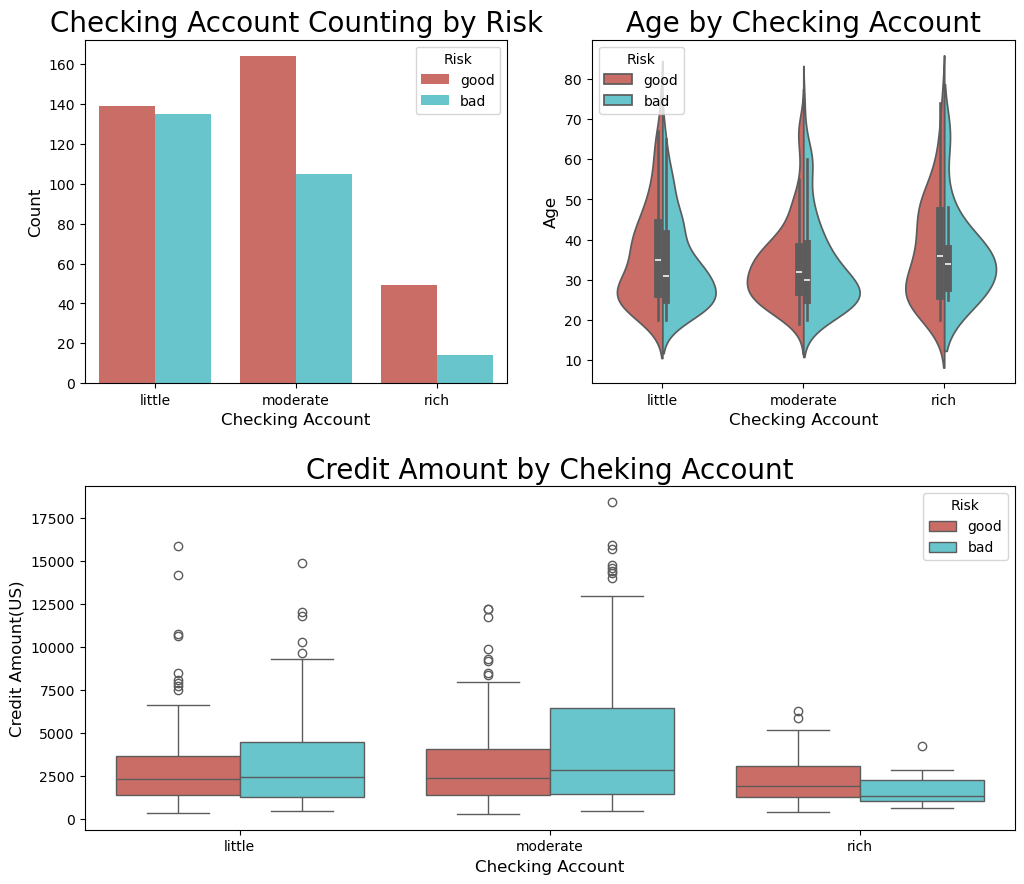

In [38]:
print("Total values of the most missing variable: ")
print(df_credit.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=df_credit, 
              palette="hls", hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Age", data=df_credit, palette="hls", hue = "Risk",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=df_credit,hue='Risk',palette="hls")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

Crosstab session and anothers to explore our data by another metrics a little deep:

In [39]:
print(pd.crosstab(df_credit.Sex, df_credit.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


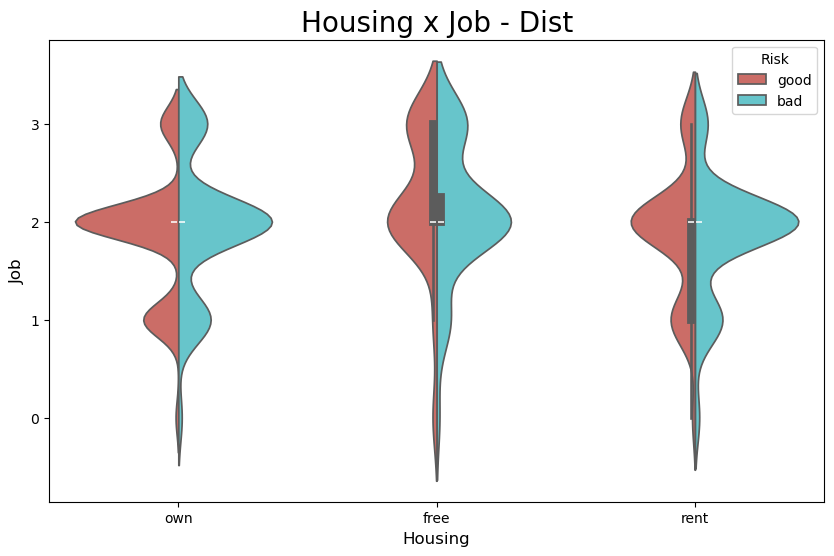

In [40]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df_credit,
                   hue="Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

In [41]:
print(pd.crosstab(df_credit["Checking account"],df_credit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [42]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [43]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


Looking at the total of values in each categorical feature

In [44]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Aget_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


# La matrice di correlazione
Vari modi per ottenerla. Per iniziare applichiamo quella di numpy di pandas (Pearson).

**Modo sbagliato**

In [45]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

Transforming the data into Dummy variables

In [46]:
#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [47]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit["Risk_good"]

In [48]:
df_credit.head()

,Age,Job,Credit amount,Duration,Credit amount log,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Savings_no_inf,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,67,2,1169,6,7.063904,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,22,2,5951,48,8.691315,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
2,49,1,2096,12,7.647786,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,45,2,7882,42,8.972337,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,53,2,4870,24,8.490849,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


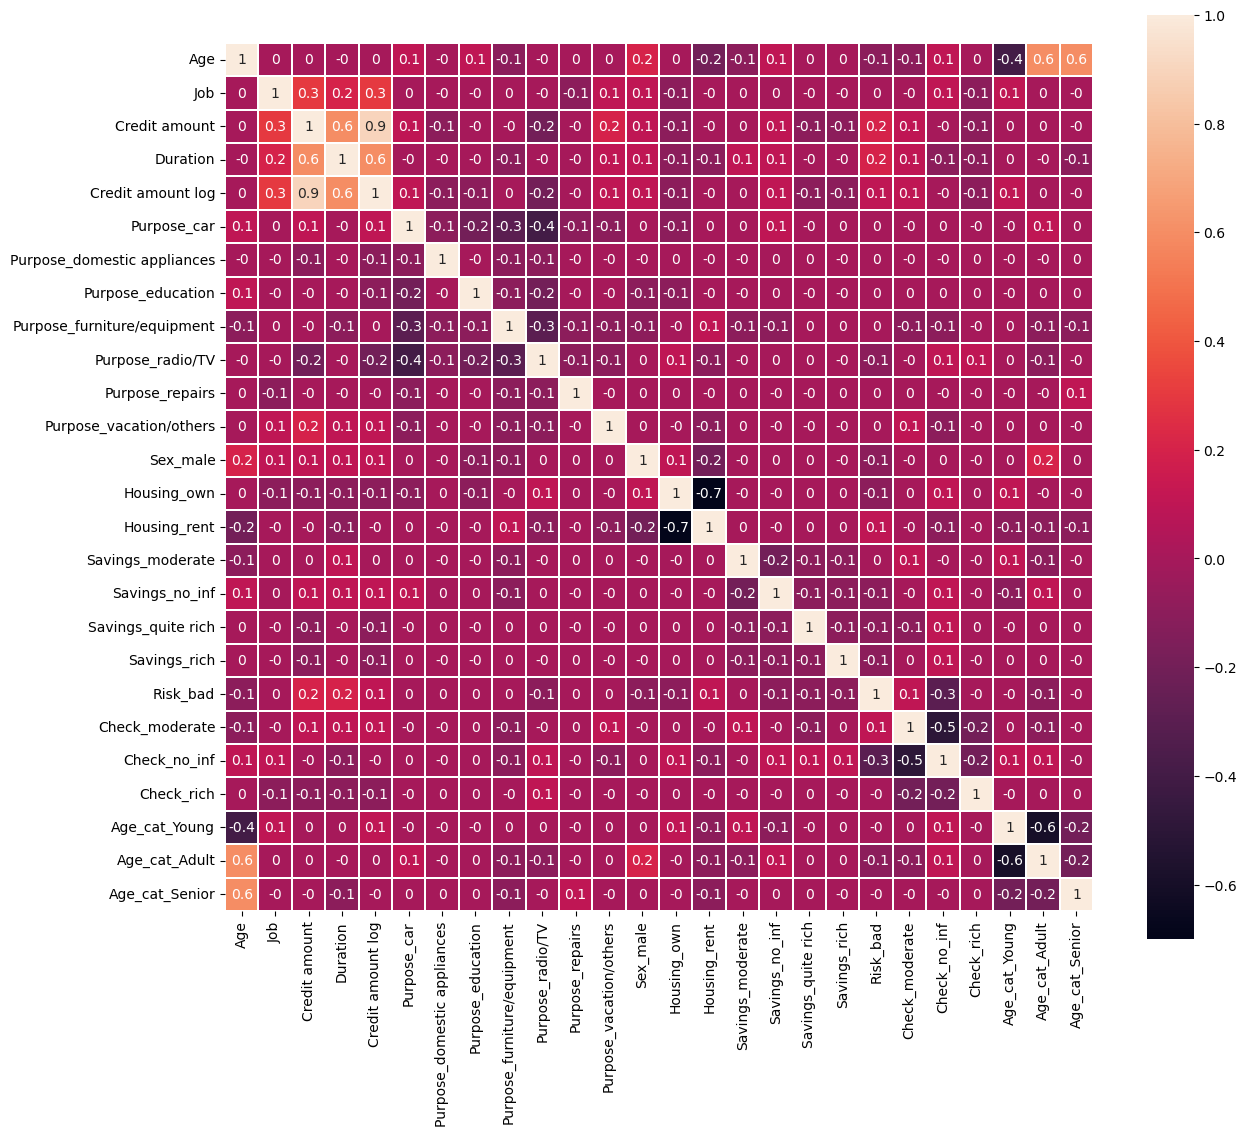

In [49]:
plt.figure(figsize=(14,12))
sns.heatmap(round(df_credit.corr(),1),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [50]:
df_credit

,Age,Job,Credit amount,Duration,Credit amount log,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Savings_no_inf,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,67,2,1169,6,7.063904,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,22,2,5951,48,8.691315,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
2,49,1,2096,12,7.647786,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,45,2,7882,42,8.972337,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,53,2,4870,24,8.490849,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,7.459339,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
996,40,3,3857,30,8.257645,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
997,38,2,804,12,6.689599,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
998,23,2,1845,45,7.520235,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


**Modo giusto**

In [51]:
predictors = df_credit.select_dtypes(['number']).columns # utile metodo per selezionare tutte e sole le variabili NUMERICHE
                                            # filtro di colonna in base al tipo colon

In [52]:
df_credit[predictors].corr()

,Age,Job,Credit amount,Duration,Credit amount log
Age,1.000000,0.015673,0.032716,-0.036136,0.011692
Job,0.015673,1.000000,0.285385,0.210910,0.304627
Credit amount,0.032716,0.285385,1.000000,0.624984,0.901375
Duration,-0.036136,0.210910,0.624984,1.000000,0.640814
Credit amount log,0.011692,0.304627,0.901375,0.640814,1.000000


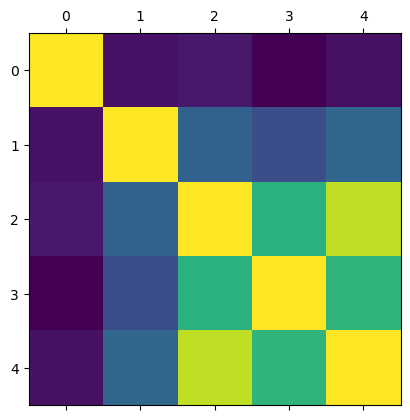

In [53]:
# la stessa matrice in formato grafico (indispensabile se p è grande) - so 29432629
import matplotlib.pyplot as plt
plt.matshow(df_credit[predictors].corr())
plt.show()

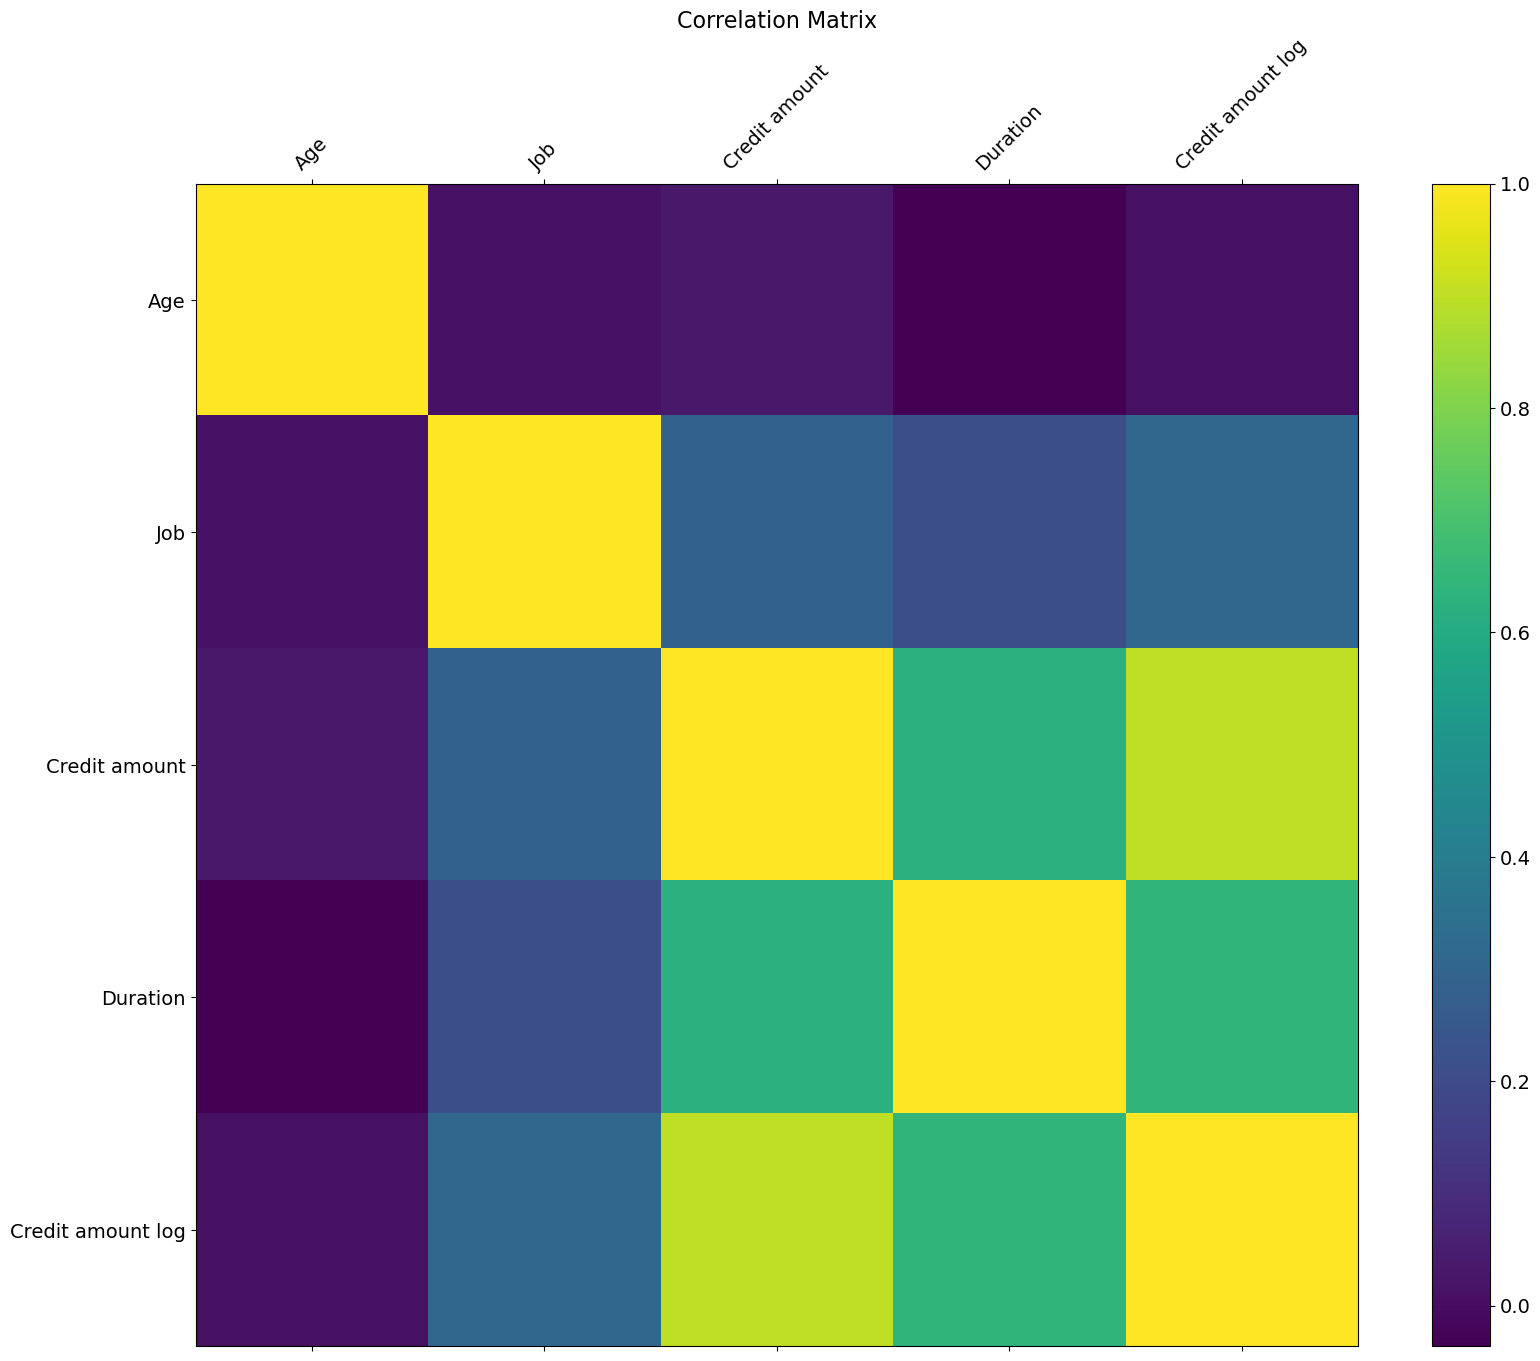

In [54]:
# lo stesso plot più grande e con una legenda dei colori - so 29432629
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df_credit[predictors].corr(), fignum=f.number)
plt.xticks(range(df_credit[predictors].select_dtypes(['number']).shape[1]), df_credit[predictors].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_credit[predictors].select_dtypes(['number']).shape[1]), df_credit[predictors].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [55]:
# ed infine con pandas - so 29432629
import pandas as pd
import numpy as np
corr = df_credit[predictors].corr()
corr.style.background_gradient(cmap='coolwarm') # 'RdBu_r', oppure 'BrBG_r', oppure ancora 'PuOr_r' sono altri buoni
                                                # schemi di colori divergenti.

,Age,Job,Credit amount,Duration,Credit amount log
Age,1.000000,0.015673,0.032716,-0.036136,0.011692
Job,0.015673,1.000000,0.285385,0.210910,0.304627
Credit amount,0.032716,0.285385,1.000000,0.624984,0.901375
Duration,-0.036136,0.210910,0.624984,1.000000,0.640814
Credit amount log,0.011692,0.304627,0.901375,0.640814,1.000000


In [56]:
# per avere il cutoff tra rossi e blu a zero, si fa:
import pandas as pd
import numpy as np
corr = df_credit[predictors].corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1) # 'RdBu_r', oppure 'BrBG_r', oppure ancora 'PuOr_r' sono altri buoni
                                                               # schemi di colori divergenti.

,Age,Job,Credit amount,Duration,Credit amount log
Age,1.000000,0.015673,0.032716,-0.036136,0.011692
Job,0.015673,1.000000,0.285385,0.210910,0.304627
Credit amount,0.032716,0.285385,1.000000,0.624984,0.901375
Duration,-0.036136,0.210910,0.624984,1.000000,0.640814
Credit amount log,0.011692,0.304627,0.901375,0.640814,1.000000


In [57]:
# per avere il cutoff tra rossi e blu a zero, si fa:
import pandas as pd
import numpy as np
corr = df_credit[predictors].corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1) # 'RdBu_r', oppure 'BrBG_r', oppure ancora 'PuOr_r' sono altri buoni
                                                               # schemi di colori divergenti.

,Age,Job,Credit amount,Duration,Credit amount log
Age,1.000000,0.015673,0.032716,-0.036136,0.011692
Job,0.015673,1.000000,0.285385,0.210910,0.304627
Credit amount,0.032716,0.285385,1.000000,0.624984,0.901375
Duration,-0.036136,0.210910,0.624984,1.000000,0.640814
Credit amount log,0.011692,0.304627,0.901375,0.640814,1.000000


I coefficienti di correlazione <x,y> sopra riportati sono stime **singole** (ottenute dal campione). Ovviamente, anche per il coefficiente di correlazione come per ogni statistica campionaria, è possibile **testare H0 (no correlazione)** tramite la funzione [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) di *scipy* (qui per i due predittori *Weight* e *Quarterly_Tax*): 

Usiamo ora un altro dataset relativo alle macchine usate:

In [62]:
car_df = pd.read_csv("ToyotaCorolla.csv")
car_df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


In [63]:
import scipy
from scipy.stats.stats import pearsonr

data_array = car_df[["Weight","Quarterly_Tax"]].to_numpy()  # la funzione 'peasonr' di scipy richiede in input due array 1D

x = data_array[:,0]  # Weight
y = data_array[:,1] # Quarterly_Tax

# correlation coefficient and p-value between x and y
scipy.stats.pearsonr(x, y)

PearsonRResult(statistic=np.float64(0.6261337328021631), pvalue=np.float64(3.656509672386385e-157))

La funzione `pearsonr` <u>non</u> fornisce l'intervallo di confidenza della stima singola (l'altra faccia del test di ipotesi).

**La correlazione di Spearman

In [68]:
predictors = car_df.select_dtypes('number')
car_df[predictors].corr(method='spearman') # spearman intercetta i legami monotonici (ad es. Y=e^X);
                                           # utile anche quando i valori sono rank (posizioni);
                                           # qui risultati simili a Pearson?!

ValueError: Boolean array expected for the condition, not int64

La seguente correzione è stata operata direttamente dall'assistente AI di Anaconda:

In [70]:
# Get numeric column names instead of the DataFrame itself
predictors = car_df.select_dtypes('number').columns

# Use the column names for correlation
car_df[predictors].corr(method='spearman')  

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Id,1.000000,-0.788577,0.937234,0.038291,-0.968028,0.334087,-0.061671,-0.079730,0.066299,-0.168050,...,-0.236710,-0.091616,-0.010968,-0.139692,-0.028657,-0.136370,-0.022140,-0.011607,-0.049086,0.159159
Price,-0.788577,1.000000,-0.842279,0.023608,0.853345,-0.615629,0.235970,0.096082,0.042542,0.120225,...,0.336825,0.062484,-0.018410,0.229823,0.014779,0.146341,0.082512,-0.020911,0.057593,-0.151358
Age_08_04,0.937234,-0.842279,1.000000,-0.183381,-0.971921,0.532091,-0.093366,-0.093181,0.042573,-0.115728,...,-0.247518,-0.061253,-0.018996,-0.137794,-0.036737,-0.138282,-0.035891,-0.019141,-0.056289,0.171087
Mfg_Month,0.038291,0.023608,-0.183381,1.000000,-0.035096,-0.018879,-0.023498,0.030400,0.009687,0.039940,...,0.023732,-0.054319,0.034614,-0.029231,0.051360,0.025458,0.022505,0.035458,0.008485,-0.041382
Mfg_Year,-0.968028,0.853345,-0.971921,-0.035096,1.000000,-0.534946,0.101039,0.087787,-0.041783,0.107691,...,0.247528,0.079555,0.009001,0.142671,0.019675,0.132297,0.024474,0.008925,0.054947,-0.166442
KM,0.334087,-0.615629,0.532091,-0.018879,-0.534946,1.000000,-0.204873,-0.059882,-0.077915,0.183837,...,-0.155144,0.002202,0.018014,-0.072596,-0.045337,-0.044301,-0.014677,0.020810,-0.072609,0.108564
HP,-0.061671,0.235970,-0.093366,-0.023498,0.101039,-0.204873,1.000000,0.081120,-0.034000,0.366279,...,0.272468,0.052640,0.016567,0.222408,-0.044174,0.001242,0.173417,0.015103,0.040071,0.112823
Met_Color,-0.079730,0.096082,-0.093181,0.030400,0.087787,-0.059882,0.081120,1.000000,-0.019335,0.047519,...,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.036691,0.148536
Automatic,0.066299,0.042542,0.042573,0.009687,-0.041783,-0.077915,-0.034000,-0.019335,1.000000,-0.054465,...,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.159985,0.018786
CC,-0.168050,0.120225,-0.115728,0.039940,0.107691,0.183837,0.366279,0.047519,-0.054465,1.000000,...,0.122452,0.071980,0.029451,0.113287,-0.056368,-0.023301,0.067807,0.028820,0.018444,0.066846


La correlazione è una misura di dipendenza tra predittori **numerici**.<br>
Per misurare l'eventuale dipendenza tra predittori **categorici**, o tra un predittore categorico ed uno numerico, si usa il [**test chi quadrato di *Pearson***](https://it.wikipedia.org/wiki/Test_chi_quadrato_di_Pearson), che utilizza una [tabella di contingenza](https://it.wikipedia.org/wiki/Tabella_di_contingenza) (spesso da creare ad hoc dal dataframe).<br>
In Python il test chi quadrato è implementato in scipy --> vedi [qui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html), [**qui**](https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/) e [qui](https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626).

**La dipendenza tra predittori categorici**

La correlazione è una misura di dipendenza tra predittori **numerici**.<br>
Per misurare l'eventuale dipendenza tra predittori **categorici**, o tra un predittore categorico ed uno numerico, si usa il [**test chi quadrato di *Pearson***](https://it.wikipedia.org/wiki/Test_chi_quadrato_di_Pearson), che utilizza una [tabella di contingenza](https://it.wikipedia.org/wiki/Tabella_di_contingenza) (spesso da creare ad hoc dal dataframe).<br>
In Python il test chi quadrato è implementato in scipy --> vedi [qui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html), [**qui**](https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/) e [qui](https://towardsdatascience.com/chi-square-test-with-python-d8ba98117626).

[La statistica di test in oggetto](images_regressione/chi_square_formula.png) 

Vediamo un'applicazione al nostro dataset, utilizzando due predittori binari (*Automatic* e *Met_Color*), per i quali è cioè possibile misurare sia la correlazione numerica (come visto prima) che la dipendenza categorica.

In [72]:
car_df.select_dtypes(['object']) # utile metodo per selezionare tutte e sole le variabili STRINGA (object);
                             # --> nessuna, in questo dataset (a parte l'identificativo di riga che è sempre visualizzato)

,Model,Fuel_Type,Color
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Silver
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Black
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,Diesel,Black
...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,Petrol,Blue
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,Petrol,Grey
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,Petrol,Blue
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,Petrol,Grey


In [73]:
# creazione della contingency table dal dataframe
cont_table = pd.crosstab(car_df["Automatic"],car_df["Met_Color"])
cont_table

Met_Color,0,1
Automatic,,
0,438,918
1,29,51


In [74]:
# esecuzione del test chi-quadrato sulla tabella di contingenza
import scipy as sp
sp.stats.chi2_contingency(observed=cont_table)
                            # --> 4 output

Chi2ContingencyResult(statistic=np.float64(0.3719861612731661), pvalue=np.float64(0.5419236256233536), dof=1, expected_freq=array([[440.98328691, 915.01671309],
       [ 26.01671309,  53.98328691]]))

Vediamo i 4 output uno per uno.

In [75]:
sp.stats.chi2_contingency(observed=cont_table)[0] # il valore della statistica di test, da confrontare con il quantile della
                                                  # distribuzione chi-quadrato per alfa=0.05 e gdl=1 (in questo caso) = 3.84.
                                                  # 0.527 << 3.84.
                                                  # Si noti che il coefficiente di correlazione dei due predittori era quasi 0!

np.float64(0.3719861612731661)

In [76]:
sp.stats.chi2_contingency(observed=cont_table)[1] # il pvalue del test di ipotesi (H0: le due variabili sono indipendenti:
                                                  # in questo caso non possiamo non accettare)

np.float64(0.5419236256233536)

In [77]:
sp.stats.chi2_contingency(observed=cont_table)[2] # i gradi di libertà, (I-1) * (J-1) = 1 * 1 = 1 
                                                  # (con I e J numero delle classi dei due predittori)

1

In [78]:
sp.stats.chi2_contingency(observed=cont_table)[3] # i valori teorici ATTESI sotto H0, cioè variabili indipendenti; 
                                                  # sono calcolati in base alle somme marginali (vedi l'help).
                                                  # qui abbastanza simili ai valori effettivi della tabella 'cont_table'

array([[440.98328691, 915.01671309],
       [ 26.01671309,  53.98328691]])

**Un ottimo esempio** di un analogo test chi-quadrato (cioè con due variabili categoriche binarie) è riportato [qui](https://adrianogilardone.com/test-del-chi-quadrato-di-indipendenza/), insieme con la tavola della distribuzione chi-quadrato. 

**Altri tipi di correlazione numerica**

**Altri modi** per calcolare la correlazione, come anche descritto in [questo](https://realpython.com/numpy-scipy-pandas-correlation-python/) ottimo articolo

In [79]:
import numpy as np
x = np.arange(10, 20)
x
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48]) # abbastanza crescente
y

array([ 2,  1,  4,  5,  8, 12, 18, 25, 96, 48])

In [80]:
r = np.corrcoef(x, y)
r
r[0, 1]
r[1, 0]


np.float64(0.7586402890911869)

Proviamo ora con vettori linearmente combinati:

In [81]:
x = np.random.randn(10)
x
y = 10*x + 5
r = np.corrcoef(x, y)
r

array([[1., 1.],
       [1., 1.]])

In [82]:
# aggiungiamo un pò di rumore ad y
x = np.random.randn(10)
x
y = 10*x + np.random.uniform(low=0,high=1,size=1)
r = np.corrcoef(x, y)
r

array([[1., 1.],
       [1., 1.]])

In [83]:
# y = x^2
x = np.random.uniform(-5,5,100)
y = np.square(x)
r = np.corrcoef(x, y)
r

array([[1.        , 0.02948441],
       [0.02948441, 1.        ]])

In [84]:
x

array([-3.39475901e+00,  4.63401409e+00,  1.45404608e+00, -2.87082930e+00,
        6.74031086e-01, -2.48159537e+00,  1.93438197e+00, -2.41440277e+00,
        3.81701024e+00,  3.04022474e+00, -2.20611107e+00,  1.29382324e+00,
        3.65045853e+00,  3.71563900e+00, -4.52669411e+00,  1.78414407e+00,
        1.74702124e+00, -4.95721378e+00,  4.43365908e+00, -1.28311766e+00,
       -3.60758850e+00,  2.90650669e+00, -2.43633647e+00, -1.27793576e+00,
       -3.81318091e+00,  1.34428769e+00, -4.34674754e+00,  4.51023574e+00,
       -4.04832429e+00,  9.21989435e-01, -2.62953357e+00, -2.46455268e-01,
       -2.42098623e+00, -3.61002602e+00, -1.52978185e+00, -6.56384426e-01,
       -1.38128365e+00,  1.96585970e+00, -1.22483696e+00,  3.73722866e+00,
        8.46338117e-01, -4.83876451e-01, -6.17011325e-01, -3.62206035e-01,
        3.77934253e+00, -3.39330990e+00,  4.43875491e+00,  2.10239386e+00,
       -1.29045921e+00, -3.54110863e-03, -2.37062002e+00,  1.57098153e+00,
        4.24787027e+00,  

In [85]:
y

array([1.15243887e+01, 2.14740866e+01, 2.11425002e+00, 8.24166088e+00,
       4.54317905e-01, 6.15831558e+00, 3.74183361e+00, 5.82934071e+00,
       1.45695672e+01, 9.24296646e+00, 4.86692603e+00, 1.67397858e+00,
       1.33258475e+01, 1.38059732e+01, 2.04909596e+01, 3.18317006e+00,
       3.05208322e+00, 2.45739684e+01, 1.96573328e+01, 1.64639094e+00,
       1.30146948e+01, 8.44778114e+00, 5.93573538e+00, 1.63311980e+00,
       1.45403486e+01, 1.80710940e+00, 1.88942142e+01, 2.03422265e+01,
       1.63889295e+01, 8.50064518e-01, 6.91444680e+00, 6.07401993e-02,
       5.86117431e+00, 1.30322879e+01, 2.34023251e+00, 4.30840515e-01,
       1.90794453e+00, 3.86460434e+00, 1.50022559e+00, 1.39668781e+01,
       7.16288208e-01, 2.34136420e-01, 3.80702975e-01, 1.31193212e-01,
       1.42834300e+01, 1.15145521e+01, 1.97025452e+01, 4.42005995e+00,
       1.66528498e+00, 1.25394503e-05, 5.61983930e+00, 2.46798296e+00,
       1.80444019e+01, 1.19735732e+00, 5.72762361e-01, 1.48038146e+00,
      

In [86]:
# correlazione di Spearman:
import scipy as sp
result = sp.stats.spearmanr(x, y)
print("Result: ", result)
print("Rho: ", result.correlation)
print("p.value: ", result.pvalue)
rho, p = sp.stats.spearmanr(x, y)
print("Rho: ", rho)
print("p.value: ", p)

Result:  SignificanceResult(statistic=np.float64(0.043144314431443134), pvalue=np.float64(0.6699494453501014))
Rho:  0.043144314431443134
p.value:  0.6699494453501014
Rho:  0.043144314431443134
p.value:  0.6699494453501014


In [87]:
# La correlazione di Spearman è calcolabile anche in pandas:
import pandas as pd
x, y = pd.Series(x), pd.Series(y)

In [88]:
x.corr(y, method='spearman')

np.float64(0.043144314431443134)